### Imports

In [43]:
import pandas as pd
import numpy as np
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer


### Data Pre-Processing

In [44]:
df = pd.read_csv("Air Quality Data in India (2015 - 2020)/city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [45]:
# Total rows
print(df.shape)
# get basic statistics on the df
df.describe()

#df.describe().to_excel("describe_aqi_data.xlsx")

(29531, 16)


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [46]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [47]:
df.dtypes 

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [48]:
# Delete AQI bucket values with nan values 
df = df.dropna(subset=['AQI_Bucket']).reset_index(drop=True)

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0       2015-01-29
1       2015-01-30
2       2015-01-31
3       2015-02-01
4       2015-02-02
           ...    
24845   2020-06-27
24846   2020-06-28
24847   2020-06-29
24848   2020-06-30
24849   2020-07-01
Name: Date, Length: 24850, dtype: datetime64[ns]

In [49]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
24846,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
24847,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
24848,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [50]:
df['AQI_Bucket'].value_counts().reset_index()

,AQI_Bucket,count
0,Moderate,8829
1,Satisfactory,8224
2,Poor,2781
3,Very Poor,2337
4,Good,1341
5,Severe,1338


In [51]:
# Bar plot showing AQI bucket distribution

fig = px.bar(df['AQI_Bucket'].value_counts().reset_index(), x='AQI_Bucket', y='count', text='count')
fig.update_layout(
    title='Value Counts of AQI Bucket',
    xaxis_title='AQI Bucket',
    yaxis_title='Count'
)
fig.show()

### Exploratory data analysis

In [52]:
# Yearly trend of AQI_Bucket values for India

result = df.groupby([df['Date'].dt.year])['AQI_Bucket'].value_counts().unstack(fill_value=0)

# Create the grouped bar chart using Plotly Express
fig = px.bar(result, barmode='group')

# Update the layout and labels
fig.update_layout(
    title='AQI_Bucket Counts per year',
    xaxis_title='Year',
    yaxis_title='Count'
)

# Show the plot
fig.show()

In [53]:
# Checking correlation of features amongst each other
df.corr(numeric_only=True)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.853200,0.459610,0.366404,0.451946,0.282001,0.093524,0.136998,0.167262,0.020743,0.119306,0.114885,0.659181
PM10,0.853200,1.000000,0.530343,0.483121,0.544327,0.392048,0.116719,0.260924,0.251704,0.018284,0.168939,0.081902,0.803313
NO,0.459610,0.530343,1.000000,0.488197,0.801345,0.184721,0.217054,0.189123,0.017864,0.041796,0.153376,0.099510,0.452191
NO2,0.366404,0.483121,0.488197,1.000000,0.633837,0.236165,0.371186,0.425414,0.295962,0.027901,0.274811,0.168651,0.537071
NOx,0.451946,0.544327,0.801345,0.633837,1.000000,0.161563,0.248999,0.259134,0.096364,0.046627,0.202927,0.101831,0.486450
NH3,0.282001,0.392048,0.184721,0.236165,0.161563,1.000000,0.114204,-0.028089,0.095282,-0.015771,0.010554,-0.020415,0.252019
CO,0.093524,0.116719,0.217054,0.371186,0.248999,0.114204,1.000000,0.511013,0.041634,0.047629,0.273694,0.138100,0.683346
SO2,0.136998,0.260924,0.189123,0.425414,0.259134,-0.028089,0.511013,1.000000,0.171489,0.039395,0.313578,0.254051,0.490586
O3,0.167262,0.251704,0.017864,0.295962,0.096364,0.095282,0.041634,0.171489,1.000000,0.018140,0.128536,0.106808,0.198991
Benzene,0.020743,0.018284,0.041796,0.027901,0.046627,-0.015771,0.047629,0.039395,0.018140,1.000000,0.764280,0.381885,0.044407


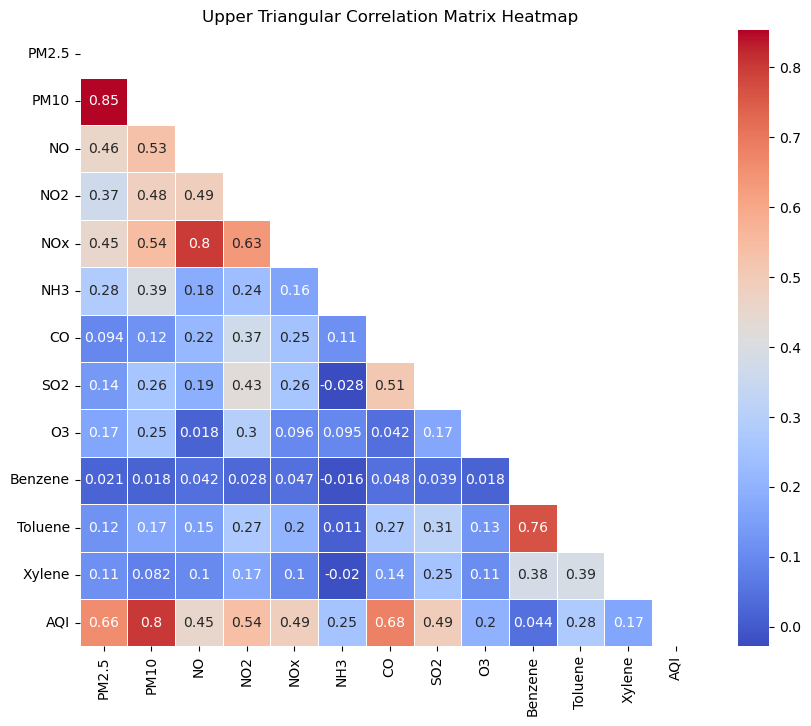

In [54]:
# Get the correlation matrix for all columns
correlation_matrix = df.corr(numeric_only=True)

# Create a mask to hide the lower half
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap with labels and the upper triangular mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)

# Set the plot title
plt.title('Upper Triangular Correlation Matrix Heatmap')

# Show the plot
plt.show()


In [55]:
df_box_plot = df.copy()

# Columns to check outliers
numerical_columns = ['PM2.5', 'PM10']  # You can add more columns if needed

# Create box plots for each numerical column
for column in numerical_columns:
    fig = px.box(df_box_plot, y=column, title=f'Box Plot of {column}',
                 labels={'y': column}, points="all")
    fig.show()


In [32]:
df_box_plot = df.copy()
df_box_plot['Year'] = df_box_plot['Date'].dt.year

# columns to check outliers
numerical_columns = ['PM2.5', 'PM10']#, 'NO', 'NO2', 'NOx']
#numerical_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Create box plots for each numerical column
for column in numerical_columns:
    fig = px.box(df_box_plot, x='Year', y=column, title=f'Box Plot of {column}',
                 labels={'y': column}, points="all", color='Year')
    fig.show()


In [33]:
# MISSING VALUES
print(df.isnull().sum())

# All the missing values are filled with the median values against each feature
# to solve the missing data problem(ref: Kumar,Pande paper).
# HJK: Wont that be bad for Xtylene which has a lot of missing values?

City              0
Date              0
PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            1857
NH3            6536
CO              445
SO2             605
O3              807
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
dtype: int64


In [34]:
# save df data 
#df.to_csv("processed_data/AQI_data_missing_values.csv", index=False)



In [41]:
import pandas as pd
import plotly.express as px

# Calculate missing values and their percentages
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Create a DataFrame to hold the missing values and percentages
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Missing Percentage': missing_percentage})

# Sort the DataFrame by missing percentage in descending order
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)

# Create a bar plot using Plotly Express
fig = px.bar(
    missing_info,
    x=missing_info.index,
    y='Missing Percentage',
    labels={'index': 'Columns', 'Missing Percentage': 'Missing Percentage'},
    title='Missing Values Percentages by Column'
)

# Customize the layout
fig.update_xaxes(tickangle=45)
fig.update_layout(autosize=False, width=800, height=500)

# Show the plot
fig.show()


In [34]:
df.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [33]:
# Impute missing values with median

# Select the numerical columns for which you want to fill missing values
numerical_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Create a SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer to fill missing values with the median
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])


import warnings
# To suppress the FutureWarning with a specific message
warnings.filterwarnings("ignore")

In [23]:
# No na values left
df.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [35]:
# save df data with imputed values
#df.to_csv("processed_data/AQI_data_imputed.csv", index=False)

In [204]:
# Scale the features?

# Since many ML algorithms are sensitive to outliers, any feature in the input 
# dataset which does not follow the general trend of that data must be found. 
# For the present dataset, a correlation-based statisti- cal outliers detection 
# method has been applied to identify the outliers. To select significant 
# features, the correlation analysis of the AQI feature has been exercised with 
# features of other pollutants. Figure 3, shown below clearly reveals that 
# pollutants PM10, PM2.5, CO, NO2, SO2, NOX, and NO are generally responsible 
# for the AQI to attain higher values.

# Many ML models function better when data have a normal distribution and 
# underperform when data have a skewed distribution. Therefore, it is necessary 
# to identify the skewness being present in the features and to perform some 
# transformations and mappings which convert the skewed distribution into a 
# normal distribution. Figure 4, given below shows that the features of Benzene,
# Toluene, CO, and Xylene are highly skewed. To make these skewed features more 
# normal, the logarithmic transformations have been used to reduce the impact of
# outliers by normalising magnitude differences.


In [205]:
# FEATURE SELECTION
# one author just uses correlation above 0.4 between features and target to choose the features
# Other techniques for feature selection?

In [206]:
# Authors K. Kumar1 · B. P. Pande2 did following in this phase

# exploring statuses and trends of air pollutants over the past six years i.e. from 2015 to 2020; 
# exploring the distribution of pollutants in the air along with top-six polluted 
# cities with their average AQI values; and 
#(c) estimating top four pollutants
# which are directly involved in increasing the AQI values.

# Include Kaggle examples


In [207]:
# Grouping by year the pollutant trend


# Group the data by pollutant and month, and calculate the mean value
#grouped_data = df.groupby([df['Date'].dt.strftime('%Y-%m')]).mean().reset_index()
''' 
grouped_data = df.groupby([df['Date'].dt.year]).mean().reset_index()


cnt = 0
# Create individual line charts for each pollutant
for pollutant in df.columns[2:-2]:  # Exclude 'Date', 'AQI', and 'AQI_Bucket' columns
    fig = px.line(grouped_data, x='Date', y=pollutant, title=f'{pollutant} Trend Over Time in India', labels={'Date': 'Year-Month'}, template='plotly_dark')
    fig.update_layout(showlegend=False)
    fig.show()

    cnt+=1
    if cnt==2:
        break # only show first 2 charts for now

'''

" \ngrouped_data = df.groupby([df['Date'].dt.year]).mean().reset_index()\n\n\ncnt = 0\n# Create individual line charts for each pollutant\nfor pollutant in df.columns[2:-2]:  # Exclude 'Date', 'AQI', and 'AQI_Bucket' columns\n    fig = px.line(grouped_data, x='Date', y=pollutant, title=f'{pollutant} Trend Over Time in India', labels={'Date': 'Year-Month'}, template='plotly_dark')\n    fig.update_layout(showlegend=False)\n    fig.show()\n\n    cnt+=1\n    if cnt==2:\n        break # only show first 2 charts for now\n\n"

### Possible ML models to use for multi class classification

Multinomial/Multi-class Logistic Classification  
Decision Tree  
Random Forest  
Naïve Bayes (NB)  
Gaussian Mixture Model (GMM)  
Gaussian Naive Basyes(GNB)  
K-nearest Neighbors (KNN)  
Discriminant Analysis  
Support Vector Machine (SVM)  
Neural Network (NN)  
RF?  
Adaptive Boosting
